# **Student Placement Predictions**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Placement.csv")

In [ ]:
df.head()

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  100 non-null    int64  
 1   CGPA        100 non-null    float64
 2   IQ          100 non-null    int64  
 3   Placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


In [ ]:
df.describe()

,Student_ID,CGPA,IQ,Placement
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,1.000000,3.300000,37.000000,0.000000
25%,25.750000,5.075000,101.500000,0.000000
50%,50.500000,6.000000,127.500000,0.500000
75%,75.250000,6.900000,149.000000,1.000000
max,100.000000,8.500000,233.000000,1.000000


In [ ]:
df.columns

Index(['Student_ID', 'CGPA', 'IQ', 'Placement'], dtype='object')

In [ ]:
df.shape

(100, 4)

In [ ]:
df['Placement'].value_counts()

1    50
0    50
Name: Placement, dtype: int64

In [ ]:
df.groupby('Placement').mean()

,Student_ID,CGPA,IQ
Placement,,,
0,46.32,5.056,126.88
1,54.68,6.926,120.28


In [ ]:
y = df['Placement']

In [ ]:
y.shape

(100,)

In [ ]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: Placement, Length: 100, dtype: int64

In [ ]:
X = df.drop(['Student_ID','Placement'],axis=1)

In [ ]:
X.shape

(100, 2)

In [ ]:
X

,CGPA,IQ
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142
...,...,...
95,4.3,200
96,4.4,42
97,6.7,182
98,6.3,103


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
X = ss.fit_transform(X)

In [ ]:
X

array([[ 0.71095807, -0.01459341],
       [-0.0799718 , -0.44233119],
       [-0.60725838, -0.0649155 ],
       [ 1.23824465,  0.21185601],
       [-0.16785289,  0.46346647],
       [ 0.97460136, -1.90167186],
       [-0.25573399,  0.48862751],
       [-0.87090167, -1.52425617],
       [ 0.0957904 ,  0.81572111],
       [-0.78302057, -1.44877303],
       [ 0.0079093 , -1.977155  ],
       [ 0.79883917,  0.36282228],
       [-0.51937728,  0.38798333],
       [ 0.35943369, -0.19072073],
       [ 0.0957904 , -0.51781433],
       [-0.78302057,  1.31894203],
       [-0.69513948,  2.52667224],
       [-2.36488031,  1.49506935],
       [-1.74971264, -0.59329747],
       [-0.69513948,  0.21185601],
       [ 0.53519588, -0.09007654],
       [ 0.97460136,  0.68991588],
       [-0.95878277, -0.09007654],
       [-1.13454496, -0.92039106],
       [-1.13454496, -0.0649155 ],
       [-0.87090167, -0.81974688],
       [ 0.88672027,  1.89764609],
       [ 0.0079093 ,  0.01056764],
       [-0.69513948,

In [ ]:
X.shape

(100, 2)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=2529)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((70, 2), (30, 2), (70,), (30,))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred.shape

(30,)

In [ ]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1])

In [ ]:
lr.predict_proba(X_test)

array([[0.08484338, 0.91515662],
       [0.94783443, 0.05216557],
       [0.82428101, 0.17571899],
       [0.11225656, 0.88774344],
       [0.45054006, 0.54945994],
       [0.96303311, 0.03696689],
       [0.12214444, 0.87785556],
       [0.09142845, 0.90857155],
       [0.89285583, 0.10714417],
       [0.20302071, 0.79697929],
       [0.96278122, 0.03721878],
       [0.95626377, 0.04373623],
       [0.42699872, 0.57300128],
       [0.30802216, 0.69197784],
       [0.00317959, 0.99682041],
       [0.95706491, 0.04293509],
       [0.0016238 , 0.9983762 ],
       [0.06225618, 0.93774382],
       [0.95869796, 0.04130204],
       [0.10522856, 0.89477144],
       [0.00499063, 0.99500937],
       [0.83590299, 0.16409701],
       [0.97985809, 0.02014191],
       [0.91409549, 0.08590451],
       [0.96348366, 0.03651634],
       [0.32586376, 0.67413624],
       [0.01668791, 0.98331209],
       [0.9761594 , 0.0238406 ],
       [0.93456742, 0.06543258],
       [0.17087254, 0.82912746]])

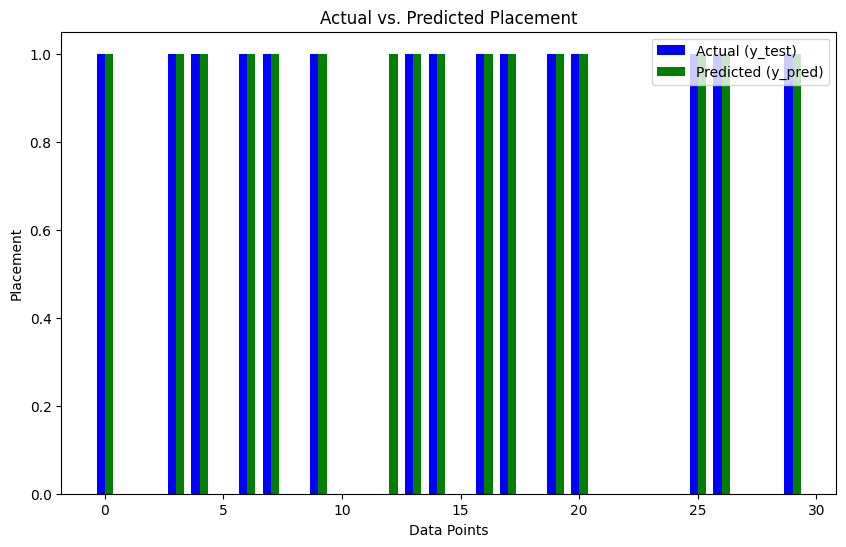

In [ ]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Bar graph banaate hain
x = np.arange(len(y_test))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, y_test, width, label='Actual (y_test)', color='blue')
plt.bar(x + width/2, y_pred, width, label='Predicted (y_pred)', color='green')

plt.xlabel('Data Points')
plt.ylabel('Placement')
plt.title('Actual vs. Predicted Placement')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[14  1]
 [ 0 15]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
X_new = df.sample(1)

In [ ]:
X_new

,Student_ID,CGPA,IQ,Placement
40,41,4.9,134,0


In [ ]:
X_new.shape

(1, 4)

In [ ]:
X_new = X_new.drop(['Student_ID','Placement'],axis=1)

In [ ]:
X_new

,CGPA,IQ
40,4.9,134


In [ ]:
X_new.shape

(1, 2)

In [ ]:
X_new = ss.fit_transform(X_new)

In [ ]:
y_pred_new = lr.predict(X_new)

In [ ]:
y_pred_new

array([0])

In [ ]:
y_prob_new = lr.predict_proba(X_new)

In [ ]:
print("Predicted Class:", y_pred_new)
print("Predicted Probabilities:", y_prob_new)

Predicted Class: [0]
Predicted Probabilities: [[0.5136401 0.4863599]]


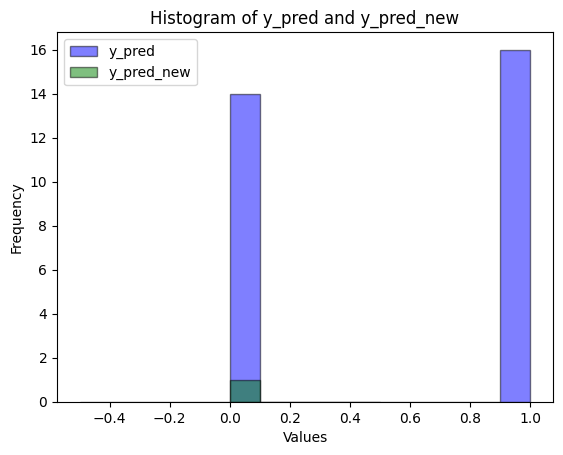

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the data for y_pred and y_pred_new
y_pred_values = [y_pred[0], y_pred_new[0]]

# Create a histogram
plt.hist(y_pred, bins=10, color='blue', alpha=0.5, label='y_pred', edgecolor='black')
plt.hist(y_pred_new, bins=10, color='green', alpha=0.5, label='y_pred_new', edgecolor='black')

# Add labels and a title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of y_pred and y_pred_new')

# Add a legend
plt.legend()

# Show the plot
plt.show()
